## **Post - Processing**

> Based on the results from Model Testing, it was evident to the team that despite the Herculean task to address and overcome the problem of overfitting in the dataset, it was becoming increasingly difficult to climb the accuracy score. One such reason the team felt was because of output dimensionality and the continued presence of too many categories and too few training data points for each category of the target variable in the dataset, as explained in Feature Engineering. To test this conjecture, as a part of postprocessing, the team decided to further bin the categories to positive, neutral and negative, reducing the number of outputs to 3.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Import the necessary libraries
import pandas as pd
import seaborn as sb

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/NNDL-Group-project/data/Feature-Engineered.csv')

In [ ]:
tweetData = df[['tweet','tweettype']].reset_index() 

In [ ]:
#Set index
tweetData.index.name = 'index'
tweetData = tweetData.set_index('index')

> Similar to Exploratory Data Analysis, further combining categories to have a total of 3 categories in the end.



In [ ]:
tweetData.head()

,tweet,tweettype
index,,
0,@ZubairSabirPTI pls dont insult the word 'Molna',anger
1,@ArcticFantasy I would have almost took offens...,anger
2,@IllinoisLoyalty that Rutgers game was an abom...,anger
3,@CozanGaming that's what lisa asked before she...,anger
4,Sometimes I get mad over something so minuscul...,anger


In [ ]:
tweetData.loc[tweetData['tweettype'] == 'anger', 'tweettype'] = 'negative'
tweetData.loc[tweetData['tweettype'] == 'fear', 'tweettype'] = 'negative'
tweetData.loc[tweetData['tweettype'] == 'joy', 'tweettype'] = 'positive'
tweetData.loc[tweetData['tweettype'] == 'sadness', 'tweettype'] = 'negative'
tweetData.loc[tweetData['tweettype'] == 'enthusiasm', 'tweettype'] = 'positive'
tweetData.loc[tweetData['tweettype'] == 'surprise', 'tweettype'] = 'positive'
tweetData.loc[tweetData['tweettype'] == 'love', 'tweettype'] = 'positive'
tweetData.loc[tweetData['tweettype'] == 'relief', 'tweettype'] = 'positive'

In [ ]:
#View the value counts of each of the three categories
tweetData['tweettype'].value_counts()

negative    18115
positive    16201
neutral      9644
Name: tweettype, dtype: int64

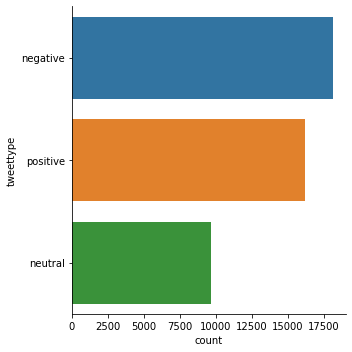

In [ ]:
#Categorical plot
sb.catplot(y = "tweettype", data = tweetData, kind = "count")

> As it can be seen from the plot above, the graph is more evenly distributed, and hence the team was confident that the result would improve significantly with postprocessing.

In [ ]:
#Export to csv
tweetData.to_csv('/content/drive/MyDrive/NNDL-Group-project/data/Postprocessed-Output.csv')